In [6]:
#!conda install -c conda-forge folium=0.5.0 --yes

In [29]:
import bs4
from bs4 import BeautifulSoup #Python Web scraping library
import requests # library to handle requests
import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

<h1><bold>I.Hungarian Population in the US</bold></h1>

In [30]:
# reference url='https://en.wikipedia.org/wiki/Hungarian_Americans'

In [31]:
#url='https://web.archive.org/web/20131213043218/http://www.hhrf.org/restitution/hungariansintheus.htm'

<h3>1. Dataset for Hungarian Population in the US<h3>
<h3>Download and Explore Dataset</bold></h3>

In [32]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [33]:
#source=https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_10_1YR_DP02&prodType=table
#please note: Although the American Community Survey (ACS) produces population, demographic and housing unit estimates, 
#it is the Census Bureau's Population Estimates Program that produces and disseminates the official estimates of the population 
#for the nation, states, counties, cities, and towns and estimates of housing units for states and counties.



In [34]:
db_hungPop= pd.read_csv('2017.csv')

In [35]:
db_hungPop

,GEO.id,GEO.id2,GEO.display-label,HC01_VC03,HC02_VC03,HC03_VC03,HC04_VC03,HC01_VC04,HC02_VC04,HC03_VC04,HC04_VC04,HC01_VC05,HC02_VC05,HC03_VC05,HC04_VC05,HC01_VC06,HC02_VC06,HC03_VC06,HC04_VC06,HC01_VC07,HC02_VC07,HC03_VC07,HC04_VC07,HC01_VC08,HC02_VC08,HC03_VC08,HC04_VC08,HC01_VC09,HC02_VC09,HC03_VC09,HC04_VC09,HC01_VC10,HC02_VC10,HC03_VC10,HC04_VC10,HC01_VC11,HC02_VC11,HC03_VC11,HC04_VC11,HC01_VC12,HC02_VC12,HC03_VC12,HC04_VC12,HC01_VC13,HC02_VC13,HC03_VC13,HC04_VC13,HC01_VC14,HC02_VC14,HC03_VC14,HC04_VC14,HC01_VC17,HC02_VC17,HC03_VC17,HC04_VC17,HC01_VC18,HC02_VC18,HC03_VC18,HC04_VC18,HC01_VC21,HC02_VC21,HC03_VC21,HC04_VC21,HC01_VC22,HC02_VC22,HC03_VC22,HC04_VC22,HC01_VC26,HC02_VC26,HC03_VC26,HC04_VC26,HC01_VC27,HC02_VC27,HC03_VC27,HC04_VC27,HC01_VC28,HC02_VC28,HC03_VC28,HC04_VC28,HC01_VC29,HC02_VC29,HC03_VC29,HC04_VC29,HC01_VC30,HC02_VC30,HC03_VC30,HC04_VC30,HC01_VC31,HC02_VC31,HC03_VC31,HC04_VC31,HC01_VC32,HC02_VC32,HC03_VC32,HC04_VC32,HC01_VC36,HC02_VC36,HC03_VC36,HC04_VC36,HC01_VC37,HC02_VC37,HC03_VC37,HC04_VC37,HC01_VC38,HC02_VC38,HC03_VC38,HC04_VC38,HC01_VC39,HC02_VC39,HC03_VC39,HC04_VC39,HC01_VC40,HC02_VC40,HC03_VC40,HC04_VC40,HC01_VC41,HC02_VC41,HC03_VC41,HC04_VC41,HC01_VC43,HC02_VC43,HC03_VC43,HC04_VC43,HC01_VC44,HC02_VC44,HC03_VC44,HC04_VC44,HC01_VC45,HC02_VC45,HC03_VC45,HC04_VC45,HC01_VC46,HC02_VC46,HC03_VC46,HC04_VC46,HC01_VC47,HC02_VC47,HC03_VC47,HC04_VC47,HC01_VC48,HC02_VC48,HC03_VC48,HC04_VC48,HC01_VC52,HC02_VC52,HC03_VC52,HC04_VC52,HC01_VC53,HC02_VC53,HC03_VC53,HC04_VC53,HC01_VC54,HC02_VC54,HC03_VC54,HC04_VC54,HC01_VC55,HC02_VC55,HC03_VC55,HC04_VC55,HC01_VC56,HC02_VC56,HC03_VC56,HC04_VC56,HC01_VC57,HC02_VC57,HC03_VC57,HC04_VC57,HC01_VC58,HC02_VC58,HC03_VC58,HC04_VC58,HC01_VC62,HC02_VC62,HC03_VC62,HC04_VC62,HC01_VC63,HC02_VC63,HC03_VC63,HC04_VC63,HC01_VC65,HC02_VC65,HC03_VC65,HC04_VC65,HC01_VC66,HC02_VC66,HC03_VC66,HC04_VC66,HC01_VC67,HC02_VC67,HC03_VC67,HC04_VC67,HC01_VC68,HC02_VC68,HC03_VC68,HC04_VC68,HC01_VC70,HC02_VC70,HC03_VC70,HC04_VC70,HC01_VC71,HC02_VC71,HC03_VC71,HC04_VC71,HC01_VC72,HC02_VC72,HC03_VC72,HC04_VC72,HC01_VC76,HC02_VC76,HC03_VC76,HC04_VC76,HC01_VC77,HC02_VC77,HC03_VC77,HC04_VC77,HC01_VC78,HC02_VC78,HC03_VC78,HC04_VC78,HC01_VC79,HC02_VC79,HC03_VC79,HC04_VC79,HC01_VC80,HC02_VC80,HC03_VC80,HC04_VC80,HC01_VC81,HC02_VC81,HC03_VC81,HC04_VC81,HC01_VC85,HC02_VC85,HC03_VC85,HC04_VC85,HC01_VC86,HC02_VC86,HC03_VC86,HC04_VC86,HC01_VC87,HC02_VC87,HC03_VC87,HC04_VC87,HC01_VC88,HC02_VC88,HC03_VC88,HC04_VC88,HC01_VC89,HC02_VC89,HC03_VC89,HC04_VC89,HC01_VC90,HC02_VC90,HC03_VC90,HC04_VC90,HC01_VC91,HC02_VC91,HC03_VC91,HC04_VC91,HC01_VC92,HC02_VC92,HC03_VC92,HC04_VC92,HC01_VC95,HC02_VC95,HC03_VC95,HC04_VC95,HC01_VC96,HC02_VC96,HC03_VC96,HC04_VC96,HC01_VC100,HC02_VC100,HC03_VC100,HC04_VC100,HC01_VC101,HC02_VC101,HC03_VC101,HC04_VC101,HC01_VC105,HC02_VC105,HC03_VC105,HC04_VC105,HC01_VC106,HC02_VC106,HC03_VC106,HC04_VC106,HC01_VC108,HC02_VC108,HC03_VC108,HC04_VC108,HC01_VC109,HC02_VC109,HC03_VC109,HC04_VC109,HC01_VC111,HC02_VC111,HC03_VC111,HC04_VC111,HC01_VC112,HC02_VC112,HC03_VC112,HC04_VC112,HC01_VC114,HC02_VC114,HC03_VC114,HC04_VC114,HC01_VC115,HC02_VC115,HC03_VC115,HC04_VC115,HC01_VC119,HC02_VC119,HC03_VC119,HC04_VC119,HC01_VC120,HC02_VC120,HC03_VC120,HC04_VC120,HC01_VC121,HC02_VC121,HC03_VC121,HC04_VC121,HC01_VC122,HC02_VC122,HC03_VC122,HC04_VC122,HC01_VC123,HC02_VC123,HC03_VC123,HC04_VC123,HC01_VC124,HC02_VC124,HC03_VC124,HC04_VC124,HC01_VC125,HC02_VC125,HC03_VC125,HC04_VC125,HC01_VC126,HC02_VC126,HC03_VC126,HC04_VC126,HC01_VC130,HC02_VC130,HC03_VC130,HC04_VC130,HC01_VC131,HC02_VC131,HC03_VC131,HC04_VC131,HC01_VC132,HC02_VC132,HC03_VC132,HC04_VC132,HC01_VC133,HC02_VC133,HC03_VC133,HC04_VC133,HC01_VC134,HC02_VC134,HC03_VC134,HC04_VC134,HC01_VC135,HC02_VC135,HC03_VC135,HC04_VC135,HC01_VC136,HC02_VC136,HC03_VC136,HC04_VC136,HC01_VC140,HC02_VC140,HC03_VC140,HC04_VC140,HC01_VC141,HC02_VC141,HC03_VC141,HC04_VC141,HC01_VC142,HC02_VC142,HC03_VC142,HC04_VC142,HC01_VC146,HC02_VC146,HC03_VC146,HC04_VC146,HC01_VC149

<h3>Data processing</h3> 


<ul><li>drop not needed columns</li>
<li>rename columns and rows</li></ul>

In [36]:
#list(db_hungPop.columns)
#examine data

In [37]:
db_hungPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 611 entries, GEO.id to HC04_VC218
dtypes: object(611)
memory usage: 9.7+ KB


In [38]:
db_hungPop.drop(columns=[ 'HC01_VC03',
 'HC02_VC03',
 'HC03_VC03',
 'HC04_VC03',
 'HC01_VC04',
 'HC02_VC04',
 'HC03_VC04',
 'HC04_VC04',
 'HC01_VC05',
 'HC02_VC05',
 'HC03_VC05',
 'HC04_VC05',
 'HC01_VC06',
 'HC02_VC06',
 'HC03_VC06',
 'HC04_VC06',
 'HC01_VC07',
 'HC02_VC07',
 'HC03_VC07',
 'HC04_VC07',
 'HC01_VC08',
 'HC02_VC08',
 'HC03_VC08',
 'HC04_VC08',
 'HC01_VC09',
 'HC02_VC09',
 'HC03_VC09',
 'HC04_VC09',
 'HC01_VC10',
 'HC02_VC10',
 'HC03_VC10',
 'HC04_VC10',
 'HC01_VC11',
 'HC02_VC11',
 'HC03_VC11',
 'HC04_VC11',
 'HC01_VC12',
 'HC02_VC12',
 'HC03_VC12',
 'HC04_VC12',
 'HC01_VC13',
 'HC02_VC13',
 'HC03_VC13',
 'HC04_VC13',
 'HC01_VC14',
 'HC02_VC14',
 'HC03_VC14',
 'HC04_VC14',
 'HC01_VC17',
 'HC02_VC17',
 'HC03_VC17',
 'HC04_VC17',
 'HC01_VC18',
 'HC02_VC18',
 'HC03_VC18',
 'HC04_VC18',
 'HC01_VC21',
 'HC02_VC21',
 'HC03_VC21',
 'HC04_VC21',
 'HC01_VC22',
 'HC02_VC22',
 'HC03_VC22',
 'HC04_VC22',
 'HC01_VC26',
 'HC02_VC26',
 'HC03_VC26',
 'HC04_VC26',
 'HC01_VC27',
 'HC02_VC27',
 'HC03_VC27',
 'HC04_VC27',
 'HC01_VC28',
 'HC02_VC28',
 'HC03_VC28',
 'HC04_VC28',
 'HC01_VC29',
 'HC02_VC29',
 'HC03_VC29',
 'HC04_VC29',
 'HC01_VC30',
 'HC02_VC30',
 'HC03_VC30',
 'HC04_VC30',
 'HC01_VC31',
 'HC02_VC31',
 'HC03_VC31',
 'HC04_VC31',
 'HC01_VC32',
 'HC02_VC32',
 'HC03_VC32',
 'HC04_VC32',
 'HC01_VC36',
 'HC02_VC36',
 'HC03_VC36',
 'HC04_VC36',
 'HC01_VC37',
 'HC02_VC37',
 'HC03_VC37',
 'HC04_VC37',
 'HC01_VC38',
 'HC02_VC38',
 'HC03_VC38',
 'HC04_VC38',
 'HC01_VC39',
 'HC02_VC39',
 'HC03_VC39',
 'HC04_VC39',
 'HC01_VC40',
 'HC02_VC40',
 'HC03_VC40',
 'HC04_VC40',
 'HC01_VC41',
 'HC02_VC41',
 'HC03_VC41',
 'HC04_VC41',
 'HC01_VC43',
 'HC02_VC43',
 'HC03_VC43',
 'HC04_VC43',
 'HC01_VC44',
 'HC02_VC44',
 'HC03_VC44',
 'HC04_VC44',
 'HC01_VC45',
 'HC02_VC45',
 'HC03_VC45',
 'HC04_VC45',
 'HC01_VC46',
 'HC02_VC46',
 'HC03_VC46',
 'HC04_VC46',
 'HC01_VC47',
 'HC02_VC47',
 'HC03_VC47',
 'HC04_VC47',
 'HC01_VC48',
 'HC02_VC48',
 'HC03_VC48',
 'HC04_VC48',
 'HC01_VC52',
 'HC02_VC52',
 'HC03_VC52',
 'HC04_VC52',
 'HC01_VC53',
 'HC02_VC53',
 'HC03_VC53',
 'HC04_VC53',
 'HC01_VC54',
 'HC02_VC54',
 'HC03_VC54',
 'HC04_VC54',
 'HC01_VC55',
 'HC02_VC55',
 'HC03_VC55',
 'HC04_VC55',
 'HC01_VC56',
 'HC02_VC56',
 'HC03_VC56',
 'HC04_VC56',
 'HC01_VC57',
 'HC02_VC57',
 'HC03_VC57',
 'HC04_VC57',
 'HC01_VC58',
 'HC02_VC58',
 'HC03_VC58',
 'HC04_VC58',
 'HC01_VC62',
 'HC02_VC62',
 'HC03_VC62',
 'HC04_VC62',
 'HC01_VC63',
 'HC02_VC63',
 'HC03_VC63',
 'HC04_VC63',
 'HC01_VC65',
 'HC02_VC65',
 'HC03_VC65',
 'HC04_VC65',
 'HC01_VC66',
 'HC02_VC66',
 'HC03_VC66',
 'HC04_VC66',
 'HC01_VC67',
 'HC02_VC67',
 'HC03_VC67',
 'HC04_VC67',
 'HC01_VC68',
 'HC02_VC68',
 'HC03_VC68',
 'HC04_VC68',
 'HC01_VC70',
 'HC02_VC70',
 'HC03_VC70',
 'HC04_VC70',
 'HC01_VC71',
 'HC02_VC71',
 'HC03_VC71',
 'HC04_VC71',
 'HC01_VC72',
 'HC02_VC72',
 'HC03_VC72',
 'HC04_VC72',
 'HC01_VC76',
 'HC02_VC76',
 'HC03_VC76',
 'HC04_VC76',
 'HC01_VC77',
 'HC02_VC77',
 'HC03_VC77',
 'HC04_VC77',
 'HC01_VC78',
 'HC02_VC78',
 'HC03_VC78',
 'HC04_VC78',
 'HC01_VC79',
 'HC02_VC79',
 'HC03_VC79',
 'HC04_VC79',
 'HC01_VC80',
 'HC02_VC80',
 'HC03_VC80',
 'HC04_VC80',
 'HC01_VC81',
 'HC02_VC81',
 'HC03_VC81',
 'HC04_VC81',
 'HC01_VC85',
 'HC02_VC85',
 'HC03_VC85',
 'HC04_VC85',
 'HC01_VC86',
 'HC02_VC86',
 'HC03_VC86',
 'HC04_VC86',
 'HC01_VC87',
 'HC02_VC87',
 'HC03_VC87',
 'HC04_VC87',
 'HC01_VC88',
 'HC02_VC88',
 'HC03_VC88',
 'HC04_VC88',
 'HC01_VC89',
 'HC02_VC89',
 'HC03_VC89',
 'HC04_VC89',
 'HC01_VC90',
 'HC02_VC90',
 'HC03_VC90',
 'HC04_VC90',
 'HC01_VC91',
 'HC02_VC91',
 'HC03_VC91',
 'HC04_VC91',
 'HC01_VC92',
 'HC02_VC92',
 'HC03_VC92',
 'HC04_VC92',
 'HC01_VC95',
 'HC02_VC95',
 'HC03_VC95',
 'HC04_VC95',
 'HC01_VC96',
 'HC02_VC96',
 'HC03_VC96',
 'HC04_VC96',
 'HC01_VC100',
 'HC02_VC100',
 'HC03_VC100',
 'HC04_VC100',
 'HC01_VC101',
 'HC02_VC101',
 'HC03_VC101',
 'HC04_VC101',
 'HC01_VC105',
 'HC02_VC105',
 'HC03_VC105',
 'HC04_VC105',
 'HC01_VC106',
 'HC02_VC106',
 'HC03_VC106',
 'HC04_VC106',
 'HC01_VC108',
 'HC02_VC108',
 'HC03_VC108',
 'HC04_VC108',
 'HC01_VC109',
 'HC02_VC109',
 'HC03_VC109',
 'HC04_VC109',
 'HC01_VC111',
 'HC02_VC111',
 'HC03_VC111',
 'HC04_VC111',
 'HC01_VC112',
 'HC02_VC112',
 'HC03_VC112',
 'HC04_VC112',
 'HC01_VC114',
 'HC02_VC114',
 'HC03_VC114',
 'HC04_VC114',
 'HC01_VC115',
 'HC02_VC115',
 'HC03_VC115',
 'HC04_VC115',
 'HC01_VC119',
 'HC02_VC119',
 'HC03_VC119',
 'HC04_VC119',
 'HC01_VC120',
 'HC02_VC120',
 'HC03_VC120',
 'HC04_VC120',
 'HC01_VC121',
 'HC02_VC121',
 'HC03_VC121',
 'HC04_VC121',
 'HC01_VC122',
 'HC02_VC122',
 'HC03_VC122',
 'HC04_VC122',
 'HC01_VC123',
 'HC02_VC123',
 'HC03_VC123',
 'HC04_VC123',
 'HC01_VC124',
 'HC02_VC124',
 'HC03_VC124',
 'HC04_VC124',
 'HC01_VC125',
 'HC02_VC125',
 'HC03_VC125',
 'HC04_VC125',
 'HC01_VC126',
 'HC02_VC126',
 'HC03_VC126',
 'HC04_VC126',
 'HC01_VC130',
 'HC02_VC130',
 'HC03_VC130',
 'HC04_VC130',
 'HC01_VC131',
 'HC02_VC131',
 'HC03_VC131',
 'HC04_VC131',
 'HC01_VC132',
 'HC02_VC132',
 'HC03_VC132',
 'HC04_VC132',
 'HC01_VC133',
 'HC02_VC133',
 'HC03_VC133',
 'HC04_VC133',
 'HC01_VC134',
 'HC02_VC134',
 'HC03_VC134',
 'HC04_VC134',
 'HC01_VC135',
 'HC02_VC135',
 'HC03_VC135',
 'HC04_VC135',
 'HC01_VC136',
 'HC02_VC136',
 'HC03_VC136',
 'HC04_VC136',
 'HC01_VC140',
 'HC02_VC140',
 'HC03_VC140',
 'HC04_VC140',
 'HC01_VC141',
 'HC02_VC141',
 'HC03_VC141',
 'HC04_VC141',
 'HC01_VC142',
 'HC02_VC142',
 'HC03_VC142',
 'HC04_VC142',
 'HC01_VC146',
 'HC02_VC146',
 'HC03_VC146',
 'HC04_VC146',
 'HC01_VC149',
 'HC02_VC149',
 'HC03_VC149',
 'HC04_VC149',
 'HC01_VC150',
 'HC02_VC150',
 'HC03_VC150',
 'HC04_VC150',
 'HC01_VC151',
 'HC02_VC151',
 'HC03_VC151',
 'HC04_VC151',
 'HC01_VC154',
 'HC02_VC154',
 'HC03_VC154',
 'HC04_VC154',
 'HC01_VC155',
 'HC02_VC155',
 'HC03_VC155',
 'HC04_VC155',
 'HC01_VC156',
 'HC02_VC156',
 'HC03_VC156',
 'HC04_VC156',
 'HC01_VC160',
 'HC02_VC160',
 'HC03_VC160',
 'HC04_VC160',
 'HC01_VC161',
 'HC02_VC161',
 'HC03_VC161',
 'HC04_VC161',
 'HC01_VC162',
 'HC02_VC162',
 'HC03_VC162',
 'HC04_VC162',
 'HC01_VC163',
 'HC02_VC163',
 'HC03_VC163',
 'HC04_VC163',
 'HC01_VC164',
 'HC02_VC164',
 'HC03_VC164',
 'HC04_VC164',
 'HC01_VC165',
 'HC02_VC165',
 'HC03_VC165',
 'HC04_VC165',
 'HC01_VC166',
 'HC02_VC166',
 'HC03_VC166',
 'HC04_VC166',
 'HC01_VC170',
 'HC02_VC170',
 'HC03_VC170',
 'HC04_VC170',
 'HC01_VC171',
 'HC02_VC171',
 'HC03_VC171',
 'HC04_VC171',
 'HC01_VC172',
 'HC02_VC172',
 'HC03_VC172',
 'HC04_VC172',
 'HC01_VC173',
 'HC02_VC173',
 'HC03_VC173',
 'HC04_VC173',
 'HC01_VC174',
 'HC02_VC174',
 'HC03_VC174',
 'HC04_VC174',
 'HC01_VC175',
 'HC02_VC175',
 'HC03_VC175',
 'HC04_VC175',
 'HC01_VC176',
 'HC02_VC176',
 'HC03_VC176',
 'HC04_VC176',
 'HC01_VC177',
 'HC02_VC177',
 'HC03_VC177',
 'HC04_VC177',
 'HC01_VC178',
 'HC02_VC178',
 'HC03_VC178',
 'HC04_VC178',
 'HC01_VC179',
 'HC02_VC179',
 'HC03_VC179',
 'HC04_VC179',
 'HC01_VC180',
 'HC02_VC180',
 'HC03_VC180',
 'HC04_VC180',
 'HC01_VC181',
 'HC02_VC181',
 'HC03_VC181',
 'HC04_VC181',
 'HC01_VC185',
 'HC02_VC185',
 'HC03_VC185',
 'HC04_VC185',
 'HC01_VC186',
 'HC02_VC186',
 'HC03_VC186',
 'HC04_VC186',
 'HC01_VC187',
 'HC02_VC187',
 'HC03_VC187',
 'HC04_VC187',
 'HC01_VC188',
 'HC02_VC188',
 'HC03_VC188',
 'HC04_VC188',
 'HC01_VC189',
 'HC02_VC189',
 'HC03_VC189',
 'HC04_VC189',
 'HC01_VC190',
 'HC02_VC190',
 'HC03_VC190',
 'HC04_VC190',
 'HC01_VC191',
 'HC02_VC191',
 'HC03_VC191',
 'HC04_VC191',
 'HC01_VC192',
 'HC02_VC192',
 'HC03_VC192',
 'HC04_VC192',
 'HC01_VC193',
 'HC02_VC193',
 'HC03_VC193',
 'HC04_VC193',
 'HC01_VC194',
 'HC02_VC194',
 'HC03_VC194',
 'HC04_VC194',
 'HC01_VC195',
 'HC02_VC195',
 'HC03_VC195',
 'HC04_VC195',
 'HC02_VC197',
 'HC03_VC197',
 'HC04_VC197',
 'HC01_VC198',
 'HC02_VC198',
 'HC03_VC198',
 'HC04_VC198',
 'HC01_VC199',
 'HC02_VC199',
 'HC03_VC199',
 'HC04_VC199',
 'HC01_VC200',
 'HC02_VC200',
 'HC03_VC200',
 'HC04_VC200',
 'HC01_VC201',
 'HC02_VC201',
 'HC03_VC201',
 'HC04_VC201',
 'HC01_VC202',
 'HC02_VC202',
 'HC03_VC202',
 'HC04_VC202',
 'HC01_VC203',
 'HC02_VC203',
 'HC03_VC203',
 'HC04_VC203',
 'HC01_VC204',
 'HC02_VC204',
 'HC03_VC204',
 'HC04_VC204',
 'HC01_VC205',
 'HC02_VC205',
 'HC03_VC205',
 'HC04_VC205',
 'HC01_VC206',
 'HC02_VC206',
 'HC03_VC206',
 'HC04_VC206',
 'HC01_VC207',
 'HC02_VC207',
 'HC03_VC207',
 'HC04_VC207',
 'HC01_VC208',
 'HC02_VC208',
 'HC03_VC208',
 'HC04_VC208',
 'HC01_VC209',
 'HC02_VC209',
 'HC03_VC209',
 'HC04_VC209',
 'HC01_VC210',
 'HC02_VC210',
 'HC03_VC210',
 'HC04_VC210',
 'HC01_VC211',
 'HC02_VC211',
 'HC03_VC211',
 'HC04_VC211',
 'HC01_VC212',
 'HC02_VC212',
 'HC03_VC212',
 'HC04_VC212',
 'HC01_VC216',
 'HC02_VC216',
 'HC03_VC216',
 'HC04_VC216',
 'HC01_VC217',
 'HC02_VC217',
 'HC03_VC217',
 'HC04_VC217',
 'HC01_VC218',
 'HC02_VC218',
 'HC03_VC218',
 ], inplace=True)

In [39]:
db_hungPop

,GEO.id,GEO.id2,GEO.display-label,HC01_VC196,HC02_VC196,HC03_VC196,HC04_VC196,HC01_VC197,HC04_VC218
0,Id,Id2,Geography,Estimate; ANCESTRY - Total population - Hungarian,Margin of Error; ANCESTRY - Total population -...,Percent; ANCESTRY - Total population - Hungarian,Percent Margin of Error; ANCESTRY - Total popu...,Estimate; ANCESTRY - Total population - Irish,Percent Margin of Error; COMPUTERS AND INTERNE...
1,0100000US,NaN,United States,1373503,24527,0.4,0.1,31479232,0.1


In [40]:
print(db_hungPop.columns)

Index(['GEO.id', 'GEO.id2', 'GEO.display-label', 'HC01_VC196', 'HC02_VC196',
       'HC03_VC196', 'HC04_VC196', 'HC01_VC197', 'HC04_VC218'],
      dtype='object')


In [41]:
db_hungPop.drop(columns=['GEO.id', 'GEO.id2','HC02_VC196','HC01_VC197', 'HC04_VC218','HC04_VC196'], inplace=True)

In [42]:
print(db_hungPop.columns)

Index(['GEO.display-label', 'HC01_VC196', 'HC03_VC196'], dtype='object')


In [43]:
db_hungPop.rename(columns={'HC01_VC196':'Hungarian Population','HC03_VC196':'Percent of US Population'}, inplace=True)

In [44]:
db_hungPop

,GEO.display-label,Hungarian Population,Percent of US Population
0,Geography,Estimate; ANCESTRY - Total population - Hungarian,Percent; ANCESTRY - Total population - Hungarian
1,United States,1373503,0.4


In [45]:
db_hungPop.at[0, 'Hungarian Population']= 'Estimate in 2017'

In [46]:
db_hungPop.at[0, 'Percent of US Population']= '%'

In [47]:
db_hungPop

,GEO.display-label,Hungarian Population,Percent of US Population
0,Geography,Estimate in 2017,%
1,United States,1373503,0.4


In [48]:
hungPop=pd.DataFrame(db_hungPop)



In [49]:
hungPop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GEO.display-label         2 non-null      object
 1   Hungarian Population      2 non-null      object
 2   Percent of US Population  2 non-null      object
dtypes: object(3)
memory usage: 176.0+ bytes


In [50]:
import matplotlib

In [51]:
import matplotlib.pyplot as plt

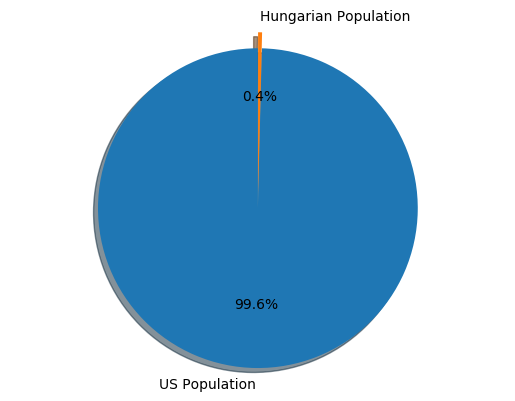

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'US Population', 'Hungarian Population'
sizes = [99.6, 0.4]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("pie.png")
plt.show()

<h1> II. Hungarian Population in the US by States</h1>

<h3>2. Dataset for Hungarian Population in the US by States</h3>

In [57]:
res = requests.get("https://web.archive.org/web/20131213043218/http://www.hhrf.org/restitution/hungariansintheus.htm")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))
df



[       0                     1            2            3         4
 0    NaN                 State  1990 Census  2000 Census    Change
 1    1.0                  Ohio       218145       193951  - 24,194
 2    2.0              New York       186898       137029  - 49,869
 3    3.0            California       159121       133988  - 25,133
 4    4.0          Pennsylvania       152863       132184  - 20,679
 5    5.0            New Jersey       141627       115615  - 26,012
 6    6.0              Michigan       109178        98036  - 11,142
 7    7.0               Florida        99822        96885   - 2,937
 8    8.0              Illinois        68439        55971  - 12,468
 9    9.0           Connecticut        49508        40836   - 8,672
 10  10.0               Indiana        40828        35715   - 5,133
 11  11.0                 Texas        31884        30234   - 1,650
 12  12.0              Virginia        25178        25783     + 605
 13  13.0             Wisconsin        25385    

<h3>Data clean up, df processing</h3>
     
<ul><li>drop not needed columns</li>
<li>rename columns and rows</li></ul>

In [58]:
df2 = pd.DataFrame(df[0])
df2.columns=df2.iloc[0]
df2=df2.iloc[1:,1:]

df2

,State,1990 Census,2000 Census,Change
1,Ohio,218145,193951,"- 24,194"
2,New York,186898,137029,"- 49,869"
3,California,159121,133988,"- 25,133"
4,Pennsylvania,152863,132184,"- 20,679"
5,New Jersey,141627,115615,"- 26,012"
6,Michigan,109178,98036,"- 11,142"
7,Florida,99822,96885,"- 2,937"
8,Illinois,68439,55971,"- 12,468"
9,Connecticut,49508,40836,"- 8,672"
10,Indiana,40828,35715,"- 5,133"


<h3><bold>Change column name, row names</bold></h3>

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


df2.rename(columns={"State": "States"}, inplace=True)
 

In [60]:
df2.at[1, 'States']= 'OH'

In [61]:
df2.at[2, 'States']= 'NY'

In [62]:
df2.at[3, 'States']= 'CA'

In [63]:
df2.at[4, 'States']= 'PA'

In [64]:
df2.at[5, 'States']= 'NJ'

In [65]:
df2.at[6, 'States']= 'MI'

In [66]:
df2.at[7, 'States']= 'FL'

In [67]:
df2.at[8, 'States']= 'IL'

In [68]:
df2.at[9, 'States']= 'CT'

In [69]:
df2.at[10, 'States']= 'IN'

In [70]:
df2.head()

,States,1990 Census,2000 Census,Change
1,OH,218145,193951,"- 24,194"
2,NY,186898,137029,"- 49,869"
3,CA,159121,133988,"- 25,133"
4,PA,152863,132184,"- 20,679"
5,NJ,141627,115615,"- 26,012"


<h3><bold>Drop not needed columns</bold></h3>

In [71]:
df2.drop(columns=['1990 Census', 'Change'], inplace=True)

In [72]:
df2.head()

,States,2000 Census
1,OH,193951
2,NY,137029
3,CA,133988
4,PA,132184
5,NJ,115615


<h3><bold>Convert string object to integer</bold></h3>

In [73]:
df2['2000 Census'] = pd.to_numeric(df2['2000 Census'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   States       51 non-null     object
 1   2000 Census  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 948.0+ bytes


<h1><bold>Data Visualization</bold></h1>

In [74]:
import seaborn as sns # data visualization library based on matplotlib.It provides a high-level interface for drawing attractive and informative statistical graphics.
%matplotlib inline

Text(0.5, 1.0, '1.1. American Hungarian Population in 2000 by States')

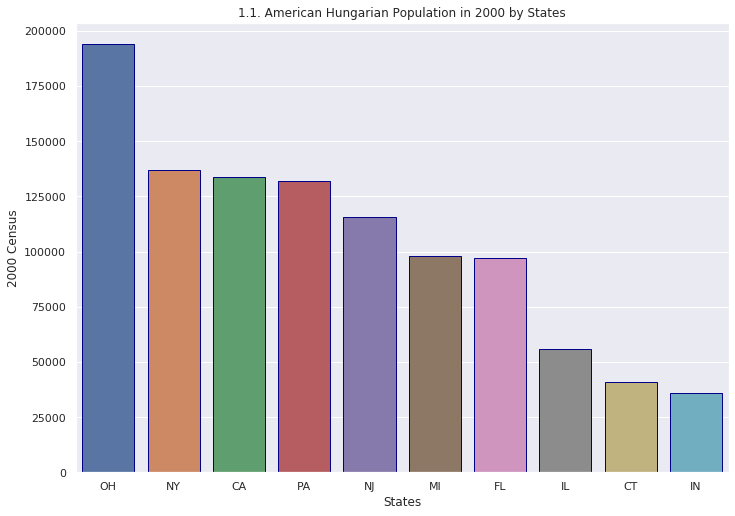

In [75]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df2.States[:10], y=df2['2000 Census'], edgecolor='darkblue')
plt.title('1.1. American Hungarian Population in 2000 by States')


In [76]:
df_hue=df2['frctn']=df2['2000 Census']/df2['2000 Census'].sum()*100

Text(0, 0.5, 'Percent of USA Total')

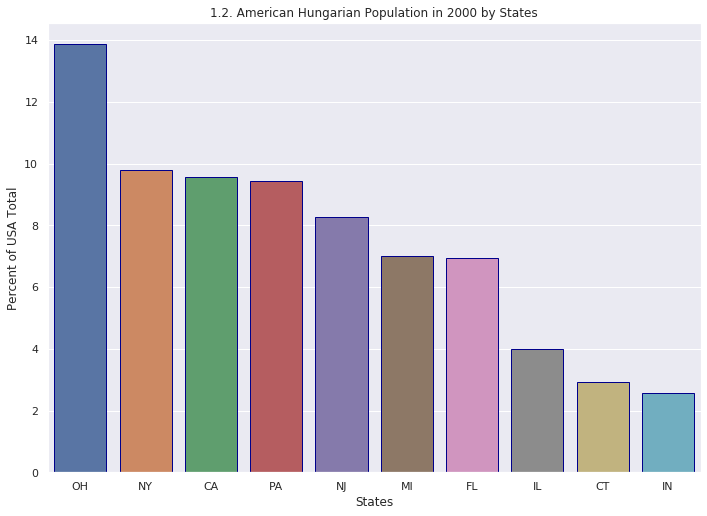

In [77]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=df2.States[:10], y=df_hue, edgecolor='darkblue')
plt.title('1.2. American Hungarian Population in 2000 by States')
plt.ylabel("Percent of USA Total")

<h1><bold>3.Hungarian population by cities of OH</bold></h1>

<h3><bold>Download and Explore Dataset</bold></h3>

In [78]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get('http://zipatlas.com/us/oh/zip-code-comparison/percentage-hungarian-population.htm')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df_rank = pd.read_html(str(table))
new_df2=df_rank[0].to_json(orient='records')
new_df2


'[{"0":null,"1":"Database Download Zip Codes with the Highest Percentage of Hungarians in Ohio  (function () {  var cx = \'013012024412622983838:nucmfhluwdu\';  var gcse = document.createElement(\'script\');  gcse.type = \'text\\/javascript\';  gcse.async = true;  gcse.src = \'https:\\/\\/cse.google.com\\/cse.js?cx=\' + cx;  var s = document.getElementsByTagName(\'script\')[0];  s.parentNode.insertBefore(gcse, s);  })();  (adsbygoogle = window.adsbygoogle || []).push({});  (adsbygoogle = window.adsbygoogle || []).push({});  (adsbygoogle = window.adsbygoogle || []).push({});  Ohio Report:  Percentage of Hungarians  Related ReportsPercentage of Hungarians in Ohio by CityPercentage of Hungarians in the United States by Zip CodePercentage of Hungarians in the United States by CitySelect City in Ohio#Zip CodeLocationCityPopulation% HungariansNational Rank1.4302940.097477, -83.440642Irwin, Ohio6219.87 %#192.4353641.313478, -84.634005Mark Center, Ohio4518.92 %#253.4390940.068145, -80.818476Bl

<h3><bold>Data processing</bold></h3>
 
<ul><li>drop not needed columns</li>
<li>rename columns and rows</li></ul>

In [79]:
df_rank2 = df_rank[9]
df_rank2.columns=df_rank2.iloc[0]
df_rank2=df_rank2.iloc[1:,1:]

df_rank2.head()

,Zip Code,Location,City,Population,% Hungarians,National Rank
1,43029,"40.097477, -83.440642","Irwin, Ohio",621,9.87 %,#19
2,43536,"41.313478, -84.634005","Mark Center, Ohio",451,8.92 %,#25
3,43909,"40.068145, -80.818476","Blaine, Ohio",87,8.82 %,#26
4,43905,"40.105937, -80.849674","Barton, Ohio",234,8.28 %,#31
5,43963,"40.174562, -80.692966","Tiltonsville, Ohio",1296,7.90 %,#34


In [80]:
df_rank2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Zip Code       100 non-null    object
 1   Location       100 non-null    object
 2   City           100 non-null    object
 3   Population     100 non-null    object
 4   % Hungarians   100 non-null    object
 5   National Rank  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


<h3><bold>Convert string object to integer</bold></h3>

In [81]:
df_rank2['% Hungarians']=df_rank2['% Hungarians'].map(lambda x: x.strip(' %'))

In [82]:
df_rank2['National Rank']=df_rank2['National Rank'].map(lambda x: x.strip(' #'))


In [83]:
df_rank2['City']=df_rank2['City'].map(lambda x: x.strip(', Ohio'))

In [84]:
df_rank2.head()

,Zip Code,Location,City,Population,% Hungarians,National Rank
1,43029,"40.097477, -83.440642",Irwin,621,9.87,19
2,43536,"41.313478, -84.634005",Mark Center,451,8.92,25
3,43909,"40.068145, -80.818476",Blaine,87,8.82,26
4,43905,"40.105937, -80.849674",Barton,234,8.28,31
5,43963,"40.174562, -80.692966",Tiltonsville,1296,7.90,34


<h3><bold>Data Clean up</bold><h3>
   

<ul><li>split 'Location' into lat and long</li>
        <li>transfer str objet to integer</li>
    <li>drop col 'Location'</li>
    <li>Rename col 'City' to 'Cities of Ohio</li></ul>

In [85]:
#split 'Location' into lat and long, transfer str objet to numeric
df_rank2['latitude'] =  pd.to_numeric(df_rank2['Location'].str.split(", ").str[0])
df_rank2['longitude'] =  pd.to_numeric(df_rank2['Location'].str.split(", ").str[1])
df_rank2['Zip Code'] = pd.to_numeric(df_rank2['Zip Code'])
df_rank2['Population'] = pd.to_numeric(df_rank2['Population'])
df_rank2['% Hungarians'] = pd.to_numeric(df_rank2['% Hungarians'])
df_rank2['National Rank'] = pd.to_numeric(df_rank2['National Rank'])

In [86]:
df_rank2.head(10)

,Zip Code,Location,City,Population,% Hungarians,National Rank,latitude,longitude
1,43029,"40.097477, -83.440642",Irwin,621,9.87,19,40.097477,-83.440642
2,43536,"41.313478, -84.634005",Mark Center,451,8.92,25,41.313478,-84.634005
3,43909,"40.068145, -80.818476",Blaine,87,8.82,26,40.068145,-80.818476
4,43905,"40.105937, -80.849674",Barton,234,8.28,31,40.105937,-80.849674
5,43963,"40.174562, -80.692966",Tiltonsville,1296,7.90,34,40.174562,-80.692966
6,44082,"41.761873, -80.567535",Pierpont,1469,7.90,35,41.761873,-80.567535
7,44099,"41.549205, -80.983305",Windsor,1647,7.58,38,41.549205,-80.983305
8,45740,"39.476847, -82.076306",Jacksonville,416,7.43,39,39.476847,-82.076306
9,44671,"40.645181, -81.365757",Sandyville,383,6.99,48,40.645181,-81.365757
10,44255,"41.303157, -81.227901",Mantua,8454,6.93,50,41.303157,-81.227901


In [87]:
df_rank2.drop(['Location'], axis=1, inplace=True)

In [88]:
df_rank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zip Code       100 non-null    int64  
 1   City           100 non-null    object 
 2   Population     100 non-null    int64  
 3   % Hungarians   100 non-null    float64
 4   National Rank  100 non-null    int64  
 5   latitude       100 non-null    float64
 6   longitude      100 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 5.6+ KB


In [89]:
#df_rank2.rename(columns={'City':'Cities of Ohio'}, inplace=True)

In [90]:
df_rank2.rename(columns={'National Rank':'nationalRank'}, inplace=True)

In [91]:
df_rank2.head()

,Zip Code,City,Population,% Hungarians,nationalRank,latitude,longitude
1,43029,Irwin,621,9.87,19,40.097477,-83.440642
2,43536,Mark Center,451,8.92,25,41.313478,-84.634005
3,43909,Blaine,87,8.82,26,40.068145,-80.818476
4,43905,Barton,234,8.28,31,40.105937,-80.849674
5,43963,Tiltonsville,1296,7.90,34,40.174562,-80.692966


In [92]:
# save the DataFrame as CSV file
rank_data=df_rank2.to_csv("rank_data.csv", index=False)

<h1><bold>Data Visualization</bold></h1>

Text(0, 0.5, 'National Rank')

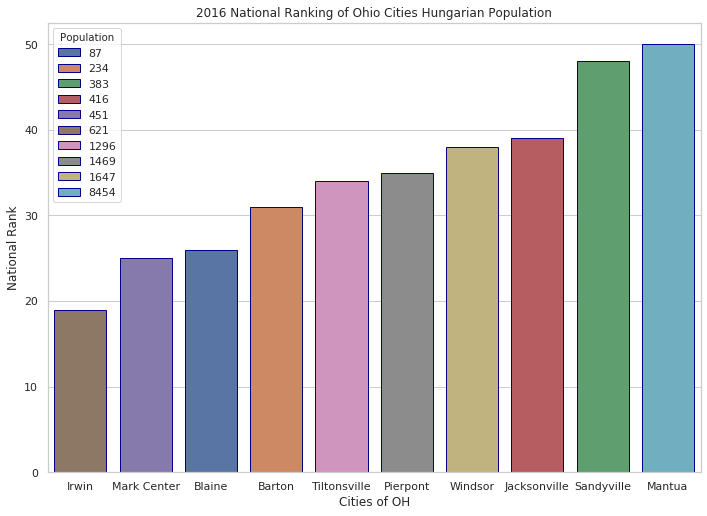

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.barplot(x="City",y="nationalRank",data=df_rank2.head(10), edgecolor='darkblue', hue="Population", dodge=False)
plt.title('2016 National Ranking of Ohio Cities Hungarian Population')
plt.xlabel("Cities of OH")
plt.ylabel("National Rank")

In [94]:
import numpy as np # library to handle data in a vectorized manner
import geopy
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h1><bold>Create a map of Cleveland with OH cities superimposed on top</bold></h1>

<h3><bold>Create a new DataFrame from the df_rank2 dataframe</bold></h3>

In [95]:
df_rank2.head()

,Zip Code,City,Population,% Hungarians,nationalRank,latitude,longitude
1,43029,Irwin,621,9.87,19,40.097477,-83.440642
2,43536,Mark Center,451,8.92,25,41.313478,-84.634005
3,43909,Blaine,87,8.82,26,40.068145,-80.818476
4,43905,Barton,234,8.28,31,40.105937,-80.849674
5,43963,Tiltonsville,1296,7.90,34,40.174562,-80.692966


In [96]:
df_coords=pd.DataFrame(df_rank2, columns=['Zip Code', 'Cities of Ohio', 'latitude', 'longitude'])

In [97]:
df_coords.head()

,Zip Code,Cities of Ohio,latitude,longitude
1,43029,NaN,40.097477,-83.440642
2,43536,NaN,41.313478,-84.634005
3,43909,NaN,40.068145,-80.818476
4,43905,NaN,40.105937,-80.849674
5,43963,NaN,40.174562,-80.692966


In [98]:
# save the DataFrame as CSV file
df_coords.to_csv("df_coords.csv", index=False)

In [99]:
from geopy.geocoders import Nominatim

In [100]:
# get the coordinates of Cleveland
address = 'Cleveland, OH'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cleveland, OH {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cleveland, OH 41.5051613, -81.6934446.


In [101]:
import folium

In [112]:
map_rank = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, cities in zip(df_coords['latitude'], df_rank2['longitude'], df_rank2['City']):
    label = '{}'.format(cities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_rank)  
    
map_rank

In [103]:
import pandas as pd
import numpy as np
#ranks=pd.read_csv('rank_data.csv')
#print('dataset is done')
import folium

<h3>Grouping the cities by national ranks on the map<h3>

In [104]:
df_rank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip Code      100 non-null    int64  
 1   City          100 non-null    object 
 2   Population    100 non-null    int64  
 3   % Hungarians  100 non-null    float64
 4   nationalRank  100 non-null    int64  
 5   latitude      100 non-null    float64
 6   longitude     100 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 5.6+ KB


In [105]:
 df_rank2.nationalRank = df_rank2.nationalRank.astype(str)

In [106]:
df_rank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip Code      100 non-null    int64  
 1   City          100 non-null    object 
 2   Population    100 non-null    int64  
 3   % Hungarians  100 non-null    float64
 4   nationalRank  100 non-null    object 
 5   latitude      100 non-null    float64
 6   longitude     100 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.6+ KB


<h3>City markers groupped into different clusters. Each cluster is then represented by the RANKS. These clusters can be thought of as pockets of Cleveland which we can then analyze separately.
To implement this, we start off by instantiating a MarkerCluster object and adding all the data points in the dataframe to this object.</h3>

In [107]:
import pandas as pd
from folium import plugins


#Cleveland, OH coordinates
latitude = 41.5051613
longitude = -81.6934446


# let's start with a clean copy of the map of Cleveland
cleveland_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

# instantiate a mark cluster object for the incidents in the dataframe
ranks = plugins.MarkerCluster().add_to(cleveland_map)

# loop through the dataframe and add each data point to the mark cluster
for latitude, longitude, label, in zip(df_rank2.latitude, df_rank2.longitude, df_rank2.nationalRank):
    folium.Marker(
        location=[latitude, longitude],
        icon=None,
        popup=label,
    ).add_to(ranks)

# display map
cleveland_map

In [115]:
#Cleveland, OH coordinates
latitude = 41.5051613
longitude = -81.6934446


# let's start with a clean copy of the map of Cleveland
cleveland_map = folium.Map(location = [latitude, longitude], zoom_start = 15)

# instantiate a mark cluster object for the incidents in the dataframe
ranks = plugins.MarkerCluster().add_to(cleveland_map)

# loop through the dataframe and add each data point to the mark cluster
for latitude, longitude, label, in zip(df_rank2.latitude, df_rank2.longitude, df_rank2.Population):
    folium.Marker(
        location=[latitude, longitude],
        icon=None,
        popup=label,
    ).add_to(ranks)

# display map
cleveland_map